<a href="https://colab.research.google.com/github/bootnoodles/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def mean(sales_list):
  total = sum(sales_list)
  mean = total/len(sales_list)
  return mean
def variance(sales_list):
  distances = list(map(lambda x: x - mean(sales_list), sales_list))
  squared_distances = list(map(lambda x: x**2, distances))
  variance = sum(squared_distances)/(len(squared_distances)-1)
  return variance
def standard_deviation(sales_list):
  variance_result = variance(sales_list)
#   print("variance", variance_result)
  std = math.sqrt(variance_result)
  return std
print("sales mean: ", mean(sales))
print("sales variance: ", variance(sales))
print("sales std: ", standard_deviation(sales))
# Lets use a library to check our work:
import pandas as pd
data = {"sales": sales}
df = pd.DataFrame(data)
print("\n")
print("Calculated via a library:")
print("df mean: ", df.sales.mean())
print("df var: ", df.sales.var(ddof=0))
print("df std: ", df.sales.std())

sales mean:  3052.714285714286
sales variance:  214387.90476190473


NameError: ignored

In [3]:
customers = [127,80,105,92,120,115,93]
series = pd.Series(customers)
df['customers'] = series
df.head()

NameError: ignored

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
customers = np.array([127, 80, 105, 92, 120, 115, 93])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
np.std(customers)

In [ ]:
np.cov(customers)

In [ ]:
np.cov(sales)

In [ ]:
std_customers = standard_deviation(customers)
std_sales = standard_deviation(sales)
print(std_customers)
print(std_sales)
## Check our work
print("\n Check our work:")
print(df.customers.std())
print(df.sales.std())
#Calculate correlation
denom = std_customers*std_sales
print("std dev products:", denom)
corr_sales_customers = cov_sales_customers/denom
print("\n Correlation between sales and customers")
print(corr_sales_customers) 
## Check work
print('Check Work:', df['sales'].corr(df['customers']))

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

In [ ]:
df.cov()
# Variance/covariance matrix

In [ ]:
df.corr()
# Correlation matrix

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [4]:
plt.arrow(0,0, 0,1, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 1,0, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.show()

NameError: ignored

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
# No their dot product is not 0 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
vector3 = np.array([2, -15, 6, 20])
np.dot(vector3, vector3)

In [ ]:
vector3t = np.transpose(vector3)
np.matmul(vector3, vector3t)

In [ ]:
# ||c||^2 = 665
v3norm = np.linalg.norm(vector3)
normsquare = v3norm * v3norm
print(normsquare)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
vectorf = np.array([4, 12, 11, 9, 2])
normf = np.linalg.norm(vectorf)

In [ ]:
unitvectorf = vectorf / normf
print(unitvectorf)

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [ ]:
plt.arrow(0,0, 0,1, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 1,0, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.show()

In [ ]:
plt.arrow(0,0, 1,0, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 2,0, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# The span is one dimensional space as they share the same line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

In [ ]:
# The span would occupy R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



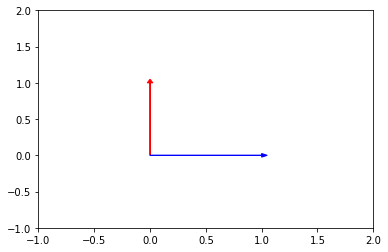

In [ ]:
plt.arrow(0,0, 0,1, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 1,0, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.show()

## 6.2 What does it mean to form a basis?

If two vectors are linearly independent then we know that these vectors can form a linear combination (scaled by some number and then composed together) to form any vector in a certain dimension of space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [1]:
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

NameError: ignored

## 7.2 What does the rank of a matrix tell us?

[link text](https://)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

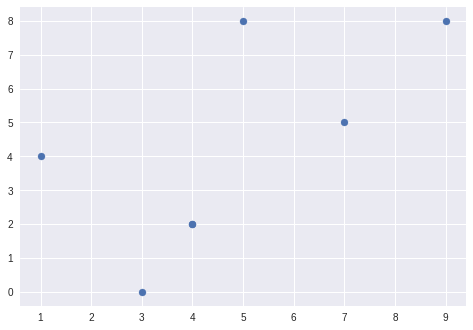

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()